In [156]:
import pandas as pd
import numpy as np
from pathlib import Path
import glob
import re
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from math import sqrt

In [157]:
import os
from pathlib import Path

In [158]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [159]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

import plotly as py
import plotly.graph_objs as go
from plotly.graph_objs import *

In [160]:
import math
#from plotly.figure_factory._county_choropleth import create_choropleth
import plotly.express as px
import plotly.figure_factory as ff

In [161]:
# What is my home directory?
home = Path.cwd()
home

WindowsPath('C:/Users/altor/Documents/GA/Project/Food/tabs_modelclassifier')

In [162]:
# what's the data directory?
datadir = Path.joinpath(home, 'data')
datadir

WindowsPath('C:/Users/altor/Documents/GA/Project/Food/tabs_modelclassifier/data')

In [163]:
# Build an indestructible filepath this way.
filepath=Path(home, 'data', 'Food_clean_Oct.csv').joinpath()
print(filepath)

C:\Users\altor\Documents\GA\Project\Food\tabs_modelclassifier\data\Food_clean_Oct.csv


In [164]:
# On a Windows machine, your file path may have to look like this:
# df=pd.read_csv(r'..\..\datasets\ufo.csv')

In [165]:
df_Oct=pd.read_csv(r'C:\Users\altor\Documents\GA\Project\Food\data\Food_clean_Oct.csv', encoding="latin1")
df_Oct.head(3)

FIPS State   County  PCT_NHWHITE10  PCT_NHBLACK10  PCT_HISP10  \
0  1085    AL  Lowndes      25.143818      73.307372    0.769980   
1  1105    AL    Perry      29.666698      68.397696    1.076386   
2  1063    AL   Greene      17.269210      81.249309    0.762852   

   PCT_NHASIAN10  PCT_NHNA10  PCT_NHPI10  PCT_65OLDER10  ...  \
0       0.123905    0.221259     0.00000      14.647314  ...   
1       0.283259    0.160514     0.04721      16.702861  ...   
2       0.165837    0.121614     0.00000      16.075180  ...   

   PCT_LACCESS_POP10  LACCESS_SNAP15  PCT_LACCESS_CHILD10  \
0          48.700787      285.620459            11.231591   
1           9.174420       72.900195             1.545144   
2          36.335157      461.358751             8.782981   

   PCT_LACCESS_SENIORS10  PCT_LACCESS_WHITE15  PCT_LACCESS_BLACK15  \
0               7.386135             5.389111            16.798525   
1               2.191450             5.361738             2.809743   
2               5.774881             4.524845            27.957278   

   PCT_LACCESS_HISP15  PCT_LACCESS_NHASIAN15  PCT_LACCESS_NHNA15  \
0            0.200691               0.018131            0.020619   
1            0.032961               0.056652            0.017644   
2            0.225042               0.021316            0.112045   

   PCT_LACCESS_NHPI15  
0                 0.0  
1                 0.0  
2                 0.0  

[3 rows x 70 columns]

In [166]:
df_Oct.shape

(3143, 70)

In [167]:
# Read that filepath into pandas.
#df=pd.read_csv(filepath, )
#df.head()

# check the dataset

In [168]:
df_Oct.columns
#df.describe(include='all')

Index(['FIPS', 'State', 'County', 'PCT_NHWHITE10', 'PCT_NHBLACK10',
       'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',
       'PCT_65OLDER10', 'PCT_18YOUNGER10', 'MEDHHINC15', 'POVRATE15',
       'PERPOV10', 'CHILDPOVRATE15', 'PERCHLDPOV10', 'METRO13', 'POPLOSS10',
       'PCT_DIABETES_ADULTS13', 'PCT_HSPA15', 'RECFAC14', 'PCH_RECFAC_09_14',
       'RECFACPTH14', 'PCH_RECFACPTH_09_14', 'FARM_TO_SCHOOL13',
       'MILK_PRICE10', 'SODA_PRICE10', 'MILK_SODA_PRICE10', 'SODATAX_STORES14',
       'SODATAX_VENDM14', 'CHIPSTAX_STORES14', 'CHIPSTAX_VENDM14',
       'FOOD_TAX14', 'FOODINSEC_13_15', 'CH_FOODINSEC_12_15',
       'VLFOODSEC_13_15', 'CH_VLFOODSEC_12_15', 'REDEMP_SNAPS12', 'PCT_SNAP12',
       'PC_SNAPBEN10', 'PCT_NSLP09', 'PCT_FREE_LUNCH09', 'PCT_REDUCED_LUNCH09',
       'PCT_SBP09', 'PCT_SFSP09', 'PC_WIC_REDEMP12', 'REDEMP_WICS12',
       'PCT_WIC09', 'FFR09', 'FFRPTH09', 'FSR09', 'FSRPTH09', 'PC_FFRSALES12',
       'PC_FSRSALES12', 'GROCPTH09', 'SUPERCPTH09', 'CONVS

In [169]:
# check missings
df_Oct.isnull().sum()

FIPS                        0
State                       0
County                      0
PCT_NHWHITE10               0
PCT_NHBLACK10               0
PCT_HISP10                  0
PCT_NHASIAN10               0
PCT_NHNA10                  0
PCT_NHPI10                  0
PCT_65OLDER10               0
PCT_18YOUNGER10             0
MEDHHINC15                  4
POVRATE15                   4
PERPOV10                    0
CHILDPOVRATE15              4
PERCHLDPOV10                0
METRO13                     0
POPLOSS10                   2
PCT_DIABETES_ADULTS13       1
PCT_HSPA15               1118
RECFAC14                    0
PCH_RECFAC_09_14          123
RECFACPTH14                 0
PCH_RECFACPTH_09_14       123
FARM_TO_SCHOOL13          208
MILK_PRICE10               34
SODA_PRICE10               34
MILK_SODA_PRICE10          34
SODATAX_STORES14            0
SODATAX_VENDM14             0
                         ... 
PCT_NSLP09                  0
PCT_FREE_LUNCH09           75
PCT_REDUCE

In [170]:
#I will drop some variables due to extensive misisngs
df_Oct2=df_Oct.drop(['REDEMP_WICS12', 'PC_WIC_REDEMP12', 'PCT_HSPA15', 'PCH_RECFAC_09_14', 'PCH_RECFACPTH_09_14', 'FARM_TO_SCHOOL13'], axis=1)

In [171]:
df_Oct2.shape

(3143, 64)

In [172]:
df_Oct2.isnull().sum()

FIPS                      0
State                     0
County                    0
PCT_NHWHITE10             0
PCT_NHBLACK10             0
PCT_HISP10                0
PCT_NHASIAN10             0
PCT_NHNA10                0
PCT_NHPI10                0
PCT_65OLDER10             0
PCT_18YOUNGER10           0
MEDHHINC15                4
POVRATE15                 4
PERPOV10                  0
CHILDPOVRATE15            4
PERCHLDPOV10              0
METRO13                   0
POPLOSS10                 2
PCT_DIABETES_ADULTS13     1
RECFAC14                  0
RECFACPTH14               0
MILK_PRICE10             34
SODA_PRICE10             34
MILK_SODA_PRICE10        34
SODATAX_STORES14          0
SODATAX_VENDM14           0
CHIPSTAX_STORES14         0
CHIPSTAX_VENDM14          0
FOOD_TAX14                0
FOODINSEC_13_15           0
                         ..
PCT_SNAP12                0
PC_SNAPBEN10             83
PCT_NSLP09                0
PCT_FREE_LUNCH09         75
PCT_REDUCED_LUNCH09 

In [173]:
df_Oct3=df_Oct2.drop(['PCT_LACCESS_NHPI15', 'PCT_LACCESS_NHNA15', 'PCT_LACCESS_NHASIAN15', 'PCT_LACCESS_HISP15', 'PCT_LACCESS_BLACK15', 'PCT_LACCESS_WHITE15', 'LACCESS_SNAP15', 'PCT_REDUCED_LUNCH09', 'PCT_FREE_LUNCH09', 'PC_SNAPBEN10', 'REDEMP_SNAPS12', 'MILK_SODA_PRICE10', 'SODA_PRICE10', 'MILK_PRICE10'], axis=1)

In [174]:
df_Oct3.shape

(3143, 50)

In [175]:
df_Oct3.isnull().sum()

FIPS                     0
State                    0
County                   0
PCT_NHWHITE10            0
PCT_NHBLACK10            0
PCT_HISP10               0
PCT_NHASIAN10            0
PCT_NHNA10               0
PCT_NHPI10               0
PCT_65OLDER10            0
PCT_18YOUNGER10          0
MEDHHINC15               4
POVRATE15                4
PERPOV10                 0
CHILDPOVRATE15           4
PERCHLDPOV10             0
METRO13                  0
POPLOSS10                2
PCT_DIABETES_ADULTS13    1
RECFAC14                 0
RECFACPTH14              0
SODATAX_STORES14         0
SODATAX_VENDM14          0
CHIPSTAX_STORES14        0
CHIPSTAX_VENDM14         0
FOOD_TAX14               0
FOODINSEC_13_15          0
CH_FOODINSEC_12_15       0
VLFOODSEC_13_15          0
CH_VLFOODSEC_12_15       0
PCT_SNAP12               0
PCT_NSLP09               0
PCT_SBP09                0
PCT_SFSP09               0
PCT_WIC09                0
FFR09                    0
FFRPTH09                 0
F

In [176]:
df_Oct3.head(5)

FIPS State   County  PCT_NHWHITE10  PCT_NHBLACK10  PCT_HISP10  \
0  1085    AL  Lowndes      25.143818      73.307372    0.769980   
1  1105    AL    Perry      29.666698      68.397696    1.076386   
2  1063    AL   Greene      17.269210      81.249309    0.762852   
3  1091    AL  Marengo      45.688876      51.543254    1.674038   
4  1119    AL   Sumter      24.006394      74.714815    0.624864   

   PCT_NHASIAN10  PCT_NHNA10  PCT_NHPI10  PCT_65OLDER10  ...  PC_FSRSALES12  \
0       0.123905    0.221259    0.000000      14.647314  ...     512.280987   
1       0.283259    0.160514    0.047210      16.702861  ...     512.280987   
2       0.165837    0.121614    0.000000      16.075180  ...     512.280987   
3       0.252057    0.147429    0.042802      16.283826  ...     512.280987   
4       0.239773    0.079924    0.007266      14.989465  ...     512.280987   

   GROCPTH09  SUPERCPTH09  CONVSPTH09  SPECSPTH09  SNAPSPTH12  WICSPTH12  \
0   0.174125     0.000000    0.870625    0.000000    1.535108   0.184213   
1   0.467727     0.000000    0.748363    0.000000    1.841666   0.392889   
2   0.544544     0.000000    0.871270    0.000000    1.708728   0.225327   
3   0.188947     0.047237    1.039206    0.000000    1.254023   0.294103   
4   0.218245     0.000000    1.382220    0.072748    1.259899   0.372384   

   PCT_LACCESS_POP10  PCT_LACCESS_CHILD10  PCT_LACCESS_SENIORS10  
0          48.700787            11.231591               7.386135  
1           9.174420             1.545144               2.191450  
2          36.335157             8.782981               5.774881  
3          26.570555             6.660849               4.196235  
4          16.157662             3.864687               2.770528  

[5 rows x 50 columns]

In [177]:
# drop missing rows from the dataset. Cannot have missings if i want to change float to string/integer...and I
# need that for the mapping and FIPS has to be integer
# get rid off the missings
print(df_Oct3.shape)
df_Oct3.dropna(inplace=True)
print(df_Oct3.shape)

(3143, 50)
(3139, 50)


In [178]:
# now is good
df_Oct3.isnull().sum()

FIPS                     0
State                    0
County                   0
PCT_NHWHITE10            0
PCT_NHBLACK10            0
PCT_HISP10               0
PCT_NHASIAN10            0
PCT_NHNA10               0
PCT_NHPI10               0
PCT_65OLDER10            0
PCT_18YOUNGER10          0
MEDHHINC15               0
POVRATE15                0
PERPOV10                 0
CHILDPOVRATE15           0
PERCHLDPOV10             0
METRO13                  0
POPLOSS10                0
PCT_DIABETES_ADULTS13    0
RECFAC14                 0
RECFACPTH14              0
SODATAX_STORES14         0
SODATAX_VENDM14          0
CHIPSTAX_STORES14        0
CHIPSTAX_VENDM14         0
FOOD_TAX14               0
FOODINSEC_13_15          0
CH_FOODINSEC_12_15       0
VLFOODSEC_13_15          0
CH_VLFOODSEC_12_15       0
PCT_SNAP12               0
PCT_NSLP09               0
PCT_SBP09                0
PCT_SFSP09               0
PCT_WIC09                0
FFR09                    0
FFRPTH09                 0
F

In [179]:
df_Oct3.columns

Index(['FIPS', 'State', 'County', 'PCT_NHWHITE10', 'PCT_NHBLACK10',
       'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',
       'PCT_65OLDER10', 'PCT_18YOUNGER10', 'MEDHHINC15', 'POVRATE15',
       'PERPOV10', 'CHILDPOVRATE15', 'PERCHLDPOV10', 'METRO13', 'POPLOSS10',
       'PCT_DIABETES_ADULTS13', 'RECFAC14', 'RECFACPTH14', 'SODATAX_STORES14',
       'SODATAX_VENDM14', 'CHIPSTAX_STORES14', 'CHIPSTAX_VENDM14',
       'FOOD_TAX14', 'FOODINSEC_13_15', 'CH_FOODINSEC_12_15',
       'VLFOODSEC_13_15', 'CH_VLFOODSEC_12_15', 'PCT_SNAP12', 'PCT_NSLP09',
       'PCT_SBP09', 'PCT_SFSP09', 'PCT_WIC09', 'FFR09', 'FFRPTH09', 'FSR09',
       'FSRPTH09', 'PC_FFRSALES12', 'PC_FSRSALES12', 'GROCPTH09',
       'SUPERCPTH09', 'CONVSPTH09', 'SPECSPTH09', 'SNAPSPTH12', 'WICSPTH12',
       'PCT_LACCESS_POP10', 'PCT_LACCESS_CHILD10', 'PCT_LACCESS_SENIORS10'],
      dtype='object')

In [180]:
# FIPS cannot have decimals for the mapping so convert it to integer
df_Oct3['FIPS2'] = df_Oct3['FIPS'].apply(lambda x: int(x))

In [181]:
df_Oct3['FIPS2'].head()

0    1085
1    1105
2    1063
3    1091
4    1119
Name: FIPS2, dtype: int64

In [182]:
df_Oct3.shape

(3139, 51)

In [183]:
df_Oct3['PCT_DIABETES_ADULTS13'].describe()

count    3139.000000
mean       11.236763
std         2.482565
min         3.300000
25%         9.500000
50%        11.100000
75%        12.900000
max        23.500000
Name: PCT_DIABETES_ADULTS13, dtype: float64

In [184]:
# map diabetes in US counties. endpts should include the endpoints of the distribution of % diabetic adults
# step1: 
colorscale = ["#f7fbff","#ebf3fb","#deebf7","#d2e3f3","#c6dbef","#b3d2e9","#9ecae1",
              "#85bcdb","#6baed6","#57a0ce","#4292c6","#3082be","#2171b5","#1361a9",
              "#08519c","#0b4083","#08306b"]
endpts = list(np.linspace(3, 23.5, len(colorscale) - 1))
fips = df_Oct3['FIPS2'].tolist()
values = df_Oct3['PCT_DIABETES_ADULTS13'].tolist()

In [185]:
# step2:
fig = ff.create_choropleth(
    fips=fips, values=values,
    binning_endpoints=endpts,
    colorscale=colorscale,
    show_state_data=False,
    show_hover=True, centroid_marker={'opacity': 0},
    asp=2.9, title='Diabetes by US county, 2013 %',
    legend_title='% adults with diabetes'
)

C:\Users\altor\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning:

Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.




In [186]:
fig.layout.template = None
#plt.savefig('Diabetes_map.jpg')
fig.show()

In [187]:
#https://plot.ly/python/static-image-export/... This is how you save jpg properly. $ conda install -c plotly plotly-orca psutil requests
if not os.path.exists("images"):
    os.mkdir("images")

In [188]:
fig.write_image("images/Diabetes_map.jpeg")

In [189]:
# dep var
df_Oct3['PCT_DIABETES_ADULTS13'].describe

<bound method NDFrame.describe of 0       23.5
1       21.7
2       21.0
3       20.2
4       20.1
5       19.6
6       19.3
7       19.2
8       19.0
9       18.7
10      18.7
11      18.7
12      18.6
13      18.6
14      18.4
15      18.4
16      18.2
17      18.2
18      18.2
19      18.1
20      18.1
21      18.0
22      17.8
23      17.8
24      17.8
25      17.7
26      17.7
27      17.7
28      17.6
29      17.6
        ... 
3111     5.8
3112     5.7
3113     5.6
3114     5.6
3115     5.6
3116     5.5
3117     5.5
3118     5.5
3119     5.5
3120     5.4
3121     5.4
3122     5.4
3123     5.3
3124     5.2
3125     5.2
3126     5.2
3127     5.1
3128     5.0
3129     4.8
3130     4.8
3131     4.7
3132     4.7
3134     4.6
3135     4.3
3136     4.2
3137     4.2
3138     4.1
3139     4.1
3140     4.1
3141     3.3
Name: PCT_DIABETES_ADULTS13, Length: 3139, dtype: float64>

# Histogram of dep var

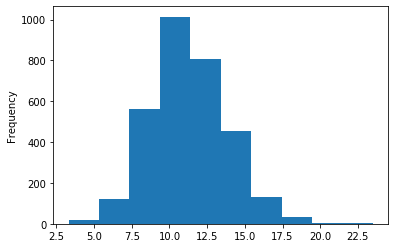

In [190]:
# histogram
df_Oct3.PCT_DIABETES_ADULTS13.plot(kind='hist');

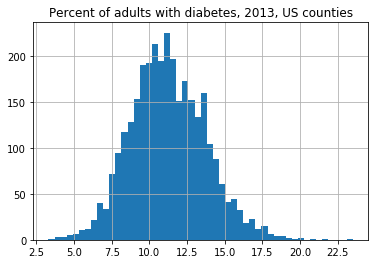

In [191]:
# have more bins; looks much better
ax = df_Oct3['PCT_DIABETES_ADULTS13'].hist(bins=50)
ax.set_title('Percent of adults with diabetes, 2013, US counties');

In [192]:
plt.savefig('Hist_diabetes.jpg')

<Figure size 432x288 with 0 Axes>

# Scatter with another continuous variable

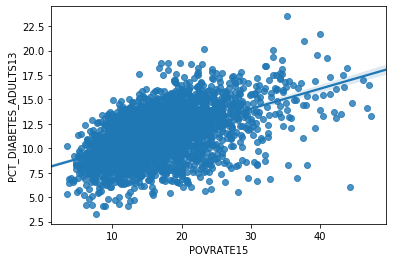

In [193]:
# diabetes and financial resources
sns.regplot(x='POVRATE15', y='PCT_DIABETES_ADULTS13', data=df_Oct3, fit_reg=True)

Text(0, 0.5, 'Proportion of adults with diabetes by county')

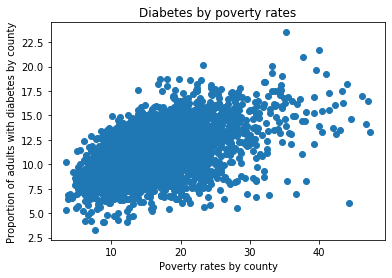

In [194]:
# with Maotplotlib
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(x=df_Oct3['POVRATE15'], y=df_Oct3['PCT_DIABETES_ADULTS13'])
plt.title('Diabetes by poverty rates')
plt.xlabel('Poverty rates by county')
plt.ylabel('Proportion of adults with diabetes by county')

In [195]:
# Ths is not saving it properly. Save it other ways..change the file extension in the folder
plt.savefig('Pov_diabetes.jpg')

<Figure size 432x288 with 0 Axes>

In [196]:
# with plotly
# Now with plotly.
data = [go.Scatter(x=df_Oct3['POVRATE15'], 
                   y=df_Oct3['PCT_DIABETES_ADULTS13'],
                   mode = 'markers',
)]
layout = go.Layout(
    title = 'Scatterplot of poverty rates and proportion of adults with diabetes, US counties', # Graph title
    xaxis = dict(title = 'Poverty rates'), # x-axis label
    yaxis = dict(title = 'Proportion of adults with diabetes'), # y-axis label
    hovermode ='closest' # handles multiple points landing on the same vertical
)
fig1 = go.Figure(data=data, layout=layout)
iplot(fig1)

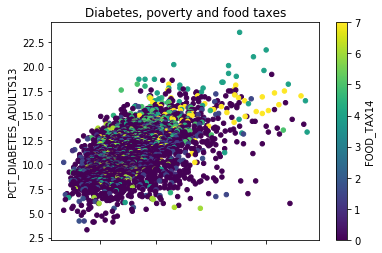

In [197]:
# diabetes and food taxes controled by financial resources
# scatter: with colormap
df_Oct3.plot(kind = 'scatter', x='POVRATE15', y='PCT_DIABETES_ADULTS13', c="FOOD_TAX14", colormap='viridis', title='Diabetes, poverty and food taxes');

In [198]:
plt.savefig('Diabeted_Pov_Foodtax.jpg')

<Figure size 432x288 with 0 Axes>

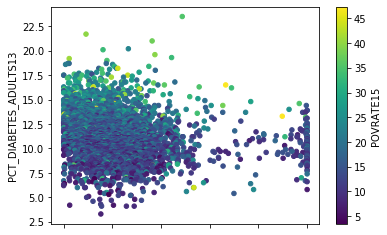

In [199]:
# diabetes and ps pop with low access to stores by poverty:
# access to stores cannot override the financial hardship and diabetes 
# scatter: with colormap
df_Oct3.plot(kind = 'scatter', x='PCT_LACCESS_POP10', y='PCT_DIABETES_ADULTS13',  c="POVRATE15", colormap='viridis');

# Create a group variable of one of the independent variable list and create a group hisotogram and/or boxplot 

In [200]:
# Check by metro/non-metro counties
df_Oct3['METRO13'].value_counts()

0    1974
1    1165
Name: METRO13, dtype: int64

In [201]:
# Compare metro non-metro counties
# diabetic by metro/nonmetro county?
diab1 = df_Oct3.groupby('METRO13')['PCT_DIABETES_ADULTS13'].mean()
diab1

METRO13
0    11.511955
1    10.770472
Name: PCT_DIABETES_ADULTS13, dtype: float64

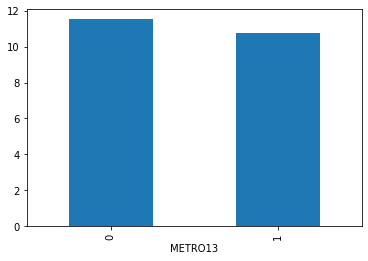

In [202]:
diab1.plot(kind='bar')
### Looks wuite ugly

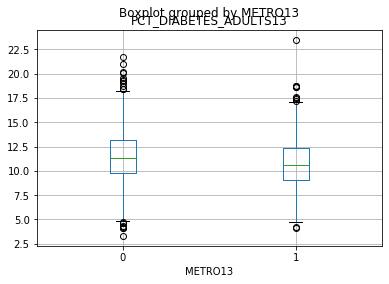

In [203]:
# boxplot fare by embarkation
df_Oct3.boxplot(column='PCT_DIABETES_ADULTS13', by='METRO13');

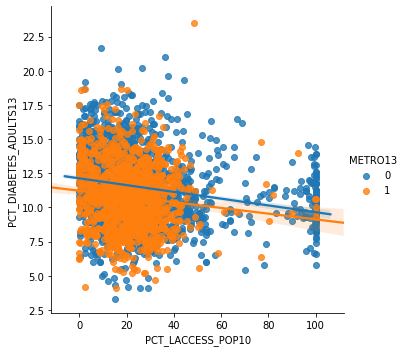

In [204]:
# Do this with seaborn
import seaborn as sns
sns.lmplot(y="PCT_DIABETES_ADULTS13", x="PCT_LACCESS_POP10",  data=df_Oct3, hue='METRO13', fit_reg='False');

In [205]:
# pickle
df_Oct3.to_pickle('Food_clean_Oct.pkl') 

# Add more variables to the data round 1

In [206]:
df2=pd.read_csv(r'C:\Users\altor\Documents\GA\Project\Food\DiabetesAtlasCountyData_phinactiv_clean.csv')

In [207]:
df2.head(5)

County    State    FIPS Phyinact_adult_20plus
0  Autauga County  Alabama  1001.0                    34
1  Baldwin County  Alabama  1003.0                    25
2  Barbour County  Alabama  1005.0                    22
3     Bibb County  Alabama  1007.0                    33
4   Blount County  Alabama  1009.0                    29

In [208]:
# check missings before data transformation
df2.isnull().sum()

County                   0
State                    1
FIPS                     1
Phyinact_adult_20plus    1
dtype: int64

In [209]:
# drop
print(df2.shape)
df2.dropna(inplace=True)
print(df2.shape)

(3227, 4)
(3226, 4)


In [210]:
# check
df2.isnull().sum()

County                   0
State                    0
FIPS                     0
Phyinact_adult_20plus    0
dtype: int64

In [211]:
# FIPS cannot have decimals for the mapping so convert it to integer
df2['FIPS2'] = df2['FIPS'].apply(lambda x: int(x))

In [212]:
# pickle
df2.to_pickle('physical_act.pkl') 

In [213]:
df2.head(5)

County    State    FIPS Phyinact_adult_20plus  FIPS2
0  Autauga County  Alabama  1001.0                    34   1001
1  Baldwin County  Alabama  1003.0                    25   1003
2  Barbour County  Alabama  1005.0                    22   1005
3     Bibb County  Alabama  1007.0                    33   1007
4   Blount County  Alabama  1009.0                    29   1009

In [214]:
df_Oct3.head()

FIPS State   County  PCT_NHWHITE10  PCT_NHBLACK10  PCT_HISP10  \
0  1085    AL  Lowndes      25.143818      73.307372    0.769980   
1  1105    AL    Perry      29.666698      68.397696    1.076386   
2  1063    AL   Greene      17.269210      81.249309    0.762852   
3  1091    AL  Marengo      45.688876      51.543254    1.674038   
4  1119    AL   Sumter      24.006394      74.714815    0.624864   

   PCT_NHASIAN10  PCT_NHNA10  PCT_NHPI10  PCT_65OLDER10  ...  GROCPTH09  \
0       0.123905    0.221259    0.000000      14.647314  ...   0.174125   
1       0.283259    0.160514    0.047210      16.702861  ...   0.467727   
2       0.165837    0.121614    0.000000      16.075180  ...   0.544544   
3       0.252057    0.147429    0.042802      16.283826  ...   0.188947   
4       0.239773    0.079924    0.007266      14.989465  ...   0.218245   

   SUPERCPTH09  CONVSPTH09  SPECSPTH09  SNAPSPTH12  WICSPTH12  \
0     0.000000    0.870625    0.000000    1.535108   0.184213   
1     0.000000    0.748363    0.000000    1.841666   0.392889   
2     0.000000    0.871270    0.000000    1.708728   0.225327   
3     0.047237    1.039206    0.000000    1.254023   0.294103   
4     0.000000    1.382220    0.072748    1.259899   0.372384   

   PCT_LACCESS_POP10  PCT_LACCESS_CHILD10  PCT_LACCESS_SENIORS10  FIPS2  
0          48.700787            11.231591               7.386135   1085  
1           9.174420             1.545144               2.191450   1105  
2          36.335157             8.782981               5.774881   1063  
3          26.570555             6.660849               4.196235   1091  
4          16.157662             3.864687               2.770528   1119  

[5 rows x 51 columns]

In [215]:
df_Oct3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3139 entries, 0 to 3141
Data columns (total 51 columns):
FIPS                     3139 non-null int64
State                    3139 non-null object
County                   3139 non-null object
PCT_NHWHITE10            3139 non-null float64
PCT_NHBLACK10            3139 non-null float64
PCT_HISP10               3139 non-null float64
PCT_NHASIAN10            3139 non-null float64
PCT_NHNA10               3139 non-null float64
PCT_NHPI10               3139 non-null float64
PCT_65OLDER10            3139 non-null float64
PCT_18YOUNGER10          3139 non-null float64
MEDHHINC15               3139 non-null float64
POVRATE15                3139 non-null float64
PERPOV10                 3139 non-null int64
CHILDPOVRATE15           3139 non-null float64
PERCHLDPOV10             3139 non-null int64
METRO13                  3139 non-null int64
POPLOSS10                3139 non-null float64
PCT_DIABETES_ADULTS13    3139 non-null float64
RECFAC14  

In [216]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3226 entries, 0 to 3225
Data columns (total 5 columns):
County                   3226 non-null object
State                    3226 non-null object
FIPS                     3226 non-null float64
Phyinact_adult_20plus    3226 non-null object
FIPS2                    3226 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 151.2+ KB


In [217]:
df2.shape

(3226, 5)

In [218]:
df_Oct3.shape

(3139, 51)

In [219]:
# Merge 1
merged = pd.merge(left=df_Oct3,right=df2, how='left', left_on='FIPS2', right_on='FIPS2')

In [220]:
merged.head(5)

FIPS_x State_x County_x  PCT_NHWHITE10  PCT_NHBLACK10  PCT_HISP10  \
0    1085      AL  Lowndes      25.143818      73.307372    0.769980   
1    1105      AL    Perry      29.666698      68.397696    1.076386   
2    1063      AL   Greene      17.269210      81.249309    0.762852   
3    1091      AL  Marengo      45.688876      51.543254    1.674038   
4    1119      AL   Sumter      24.006394      74.714815    0.624864   

   PCT_NHASIAN10  PCT_NHNA10  PCT_NHPI10  PCT_65OLDER10  ...  SNAPSPTH12  \
0       0.123905    0.221259    0.000000      14.647314  ...    1.535108   
1       0.283259    0.160514    0.047210      16.702861  ...    1.841666   
2       0.165837    0.121614    0.000000      16.075180  ...    1.708728   
3       0.252057    0.147429    0.042802      16.283826  ...    1.254023   
4       0.239773    0.079924    0.007266      14.989465  ...    1.259899   

   WICSPTH12  PCT_LACCESS_POP10  PCT_LACCESS_CHILD10  PCT_LACCESS_SENIORS10  \
0   0.184213          48.700787            11.231591               7.386135   
1   0.392889           9.174420             1.545144               2.191450   
2   0.225327          36.335157             8.782981               5.774881   
3   0.294103          26.570555             6.660849               4.196235   
4   0.372384          16.157662             3.864687               2.770528   

   FIPS2        County_y  State_y  FIPS_y  Phyinact_adult_20plus  
0   1085  Lowndes County  Alabama  1085.0                     33  
1   1105    Perry County  Alabama  1105.0                     34  
2   1063   Greene County  Alabama  1063.0                     17  
3   1091  Marengo County  Alabama  1091.0                     31  
4   1119   Sumter County  Alabama  1119.0                     37  

[5 rows x 55 columns]

# Add more variables to the data round 2

In [221]:
## Add the addiitonal county typology variables
df3=pd.read_csv(r'C:\Users\altor\Documents\GA\Project\Food\data\County_Typology.csv')

In [222]:
df3.columns

Index(['FIPStxt', 'State', 'County_name',
       'Metro-nonmetro status, 2013 0=Nonmetro 1=Metro',
       'Non-Overlapping Economic Types: Type_2015_Update',
       'Farming_2015_Update (allows overlap, 1=yes)',
       'Mining_2015-Update (allows overlap, 1=yes)',
       'Manufacturing_2015_Update (allows overlap, 1=yes)',
       'Government_2015_Update (allows overlap, 1=yes)',
       'Recreation_2015_Update (allows overlap, 1=yes)',
       'Nonspecialized_2015_Update (allows overlap, 1=yes)',
       'Low_Education_2015_Update', 'Low_Employment_Cnty_2008_2012_25_64',
       'Pop_Loss_2010', 'Retirement_Dest_2015_Update',
       'Persistent_Poverty_2013', 'Persistent_Related_Child_Poverty_2013'],
      dtype='object')

In [223]:
df3.isnull().sum()

FIPStxt                                               0
State                                                 0
County_name                                           0
Metro-nonmetro status, 2013 0=Nonmetro 1=Metro        0
Non-Overlapping Economic Types: Type_2015_Update      0
Farming_2015_Update (allows overlap, 1=yes)           0
Mining_2015-Update (allows overlap, 1=yes)            0
Manufacturing_2015_Update (allows overlap, 1=yes)     0
Government_2015_Update (allows overlap, 1=yes)        0
Recreation_2015_Update (allows overlap, 1=yes)        0
Nonspecialized_2015_Update (allows overlap, 1=yes)    0
Low_Education_2015_Update                             0
Low_Employment_Cnty_2008_2012_25_64                   0
Pop_Loss_2010                                         0
Retirement_Dest_2015_Update                           0
Persistent_Poverty_2013                               0
Persistent_Related_Child_Poverty_2013                 0
dtype: int64

In [224]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3143 entries, 0 to 3142
Data columns (total 17 columns):
FIPStxt                                               3143 non-null int64
State                                                 3143 non-null object
County_name                                           3143 non-null object
Metro-nonmetro status, 2013 0=Nonmetro 1=Metro        3143 non-null int64
Non-Overlapping Economic Types: Type_2015_Update      3143 non-null int64
Farming_2015_Update (allows overlap, 1=yes)           3143 non-null int64
Mining_2015-Update (allows overlap, 1=yes)            3143 non-null int64
Manufacturing_2015_Update (allows overlap, 1=yes)     3143 non-null int64
Government_2015_Update (allows overlap, 1=yes)        3143 non-null int64
Recreation_2015_Update (allows overlap, 1=yes)        3143 non-null int64
Nonspecialized_2015_Update (allows overlap, 1=yes)    3143 non-null int64
Low_Education_2015_Update                             3143 non-null int64
Low

In [225]:
# A couple of variables can be dropped as they might be redundat with what we already have...
df4=df3.drop(['Persistent_Poverty_2013', 'Persistent_Related_Child_Poverty_2013'], axis=1)

In [226]:
df4.head(3)

FIPStxt State     County_name  \
0     1001    AL  Autauga County   
1     1003    AL  Baldwin County   
2     1005    AL  Barbour County   

   Metro-nonmetro status, 2013 0=Nonmetro 1=Metro  \
0                                               1   
1                                               1   
2                                               0   

   Non-Overlapping Economic Types: Type_2015_Update  \
0                                                 0   
1                                                 5   
2                                                 3   

   Farming_2015_Update (allows overlap, 1=yes)  \
0                                            0   
1                                            0   
2                                            0   

   Mining_2015-Update (allows overlap, 1=yes)  \
0                                           0   
1                                           0   
2                                           0   

   Manufacturing_2015_Update (allows overlap, 1=yes)  \
0                                                  0   
1                                                  0   
2                                                  1   

   Government_2015_Update (allows overlap, 1=yes)  \
0                                               0   
1                                               0   
2                                               0   

   Recreation_2015_Update (allows overlap, 1=yes)  \
0                                               0   
1                                               1   
2                                               0   

   Nonspecialized_2015_Update (allows overlap, 1=yes)  \
0                                                  1    
1                                                  0    
2                                                  0    

   Low_Education_2015_Update  Low_Employment_Cnty_2008_2012_25_64  \
0                          0                                    0   
1                          0                                    0   
2                          1                                    1   

   Pop_Loss_2010  Retirement_Dest_2015_Update  
0              0                            1  
1              0                            1  
2              0                            0

In [227]:
df4.shape

(3143, 15)

In [228]:
merged.shape

(3139, 55)

In [229]:
# Merge 2
merged2 = pd.merge(left=merged,right=df4, how='left', left_on='FIPS2', right_on='FIPStxt')

In [230]:
merged2.shape

(3139, 70)

In [231]:
merged2.head()

FIPS_x State_x County_x  PCT_NHWHITE10  PCT_NHBLACK10  PCT_HISP10  \
0    1085      AL  Lowndes      25.143818      73.307372    0.769980   
1    1105      AL    Perry      29.666698      68.397696    1.076386   
2    1063      AL   Greene      17.269210      81.249309    0.762852   
3    1091      AL  Marengo      45.688876      51.543254    1.674038   
4    1119      AL   Sumter      24.006394      74.714815    0.624864   

   PCT_NHASIAN10  PCT_NHNA10  PCT_NHPI10  PCT_65OLDER10  ...  \
0       0.123905    0.221259    0.000000      14.647314  ...   
1       0.283259    0.160514    0.047210      16.702861  ...   
2       0.165837    0.121614    0.000000      16.075180  ...   
3       0.252057    0.147429    0.042802      16.283826  ...   
4       0.239773    0.079924    0.007266      14.989465  ...   

   Farming_2015_Update (allows overlap, 1=yes)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Mining_2015-Update (allows overlap, 1=yes)  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Manufacturing_2015_Update (allows overlap, 1=yes)  \
0                                                  1   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Government_2015_Update (allows overlap, 1=yes)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               1   

   Recreation_2015_Update (allows overlap, 1=yes)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Nonspecialized_2015_Update (allows overlap, 1=yes)  \
0                                                  0    
1                                                  1    
2                                                  1    
3                                                  1    
4                                                  0    

   Low_Education_2015_Update  Low_Employment_Cnty_2008_2012_25_64  \
0                          0                                    1   
1                          1                                    1   
2                          0                                    1   
3                          0                                    1   
4                          0                                    1   

   Pop_Loss_2010  Retirement_Dest_2015_Update  
0              0                            0  
1              1                            0  
2              1                            0  
3              1                            0  
4              1                            0  

[5 rows x 70 columns]

In [232]:
merged2.columns

Index(['FIPS_x', 'State_x', 'County_x', 'PCT_NHWHITE10', 'PCT_NHBLACK10',
       'PCT_HISP10', 'PCT_NHASIAN10', 'PCT_NHNA10', 'PCT_NHPI10',
       'PCT_65OLDER10', 'PCT_18YOUNGER10', 'MEDHHINC15', 'POVRATE15',
       'PERPOV10', 'CHILDPOVRATE15', 'PERCHLDPOV10', 'METRO13', 'POPLOSS10',
       'PCT_DIABETES_ADULTS13', 'RECFAC14', 'RECFACPTH14', 'SODATAX_STORES14',
       'SODATAX_VENDM14', 'CHIPSTAX_STORES14', 'CHIPSTAX_VENDM14',
       'FOOD_TAX14', 'FOODINSEC_13_15', 'CH_FOODINSEC_12_15',
       'VLFOODSEC_13_15', 'CH_VLFOODSEC_12_15', 'PCT_SNAP12', 'PCT_NSLP09',
       'PCT_SBP09', 'PCT_SFSP09', 'PCT_WIC09', 'FFR09', 'FFRPTH09', 'FSR09',
       'FSRPTH09', 'PC_FFRSALES12', 'PC_FSRSALES12', 'GROCPTH09',
       'SUPERCPTH09', 'CONVSPTH09', 'SPECSPTH09', 'SNAPSPTH12', 'WICSPTH12',
       'PCT_LACCESS_POP10', 'PCT_LACCESS_CHILD10', 'PCT_LACCESS_SENIORS10',
       'FIPS2', 'County_y', 'State_y', 'FIPS_y', 'Phyinact_adult_20plus',
       'FIPStxt', 'State', 'County_name',
       'Metro-non

# data exploration

In [233]:
merged2.head(5)

FIPS_x State_x County_x  PCT_NHWHITE10  PCT_NHBLACK10  PCT_HISP10  \
0    1085      AL  Lowndes      25.143818      73.307372    0.769980   
1    1105      AL    Perry      29.666698      68.397696    1.076386   
2    1063      AL   Greene      17.269210      81.249309    0.762852   
3    1091      AL  Marengo      45.688876      51.543254    1.674038   
4    1119      AL   Sumter      24.006394      74.714815    0.624864   

   PCT_NHASIAN10  PCT_NHNA10  PCT_NHPI10  PCT_65OLDER10  ...  \
0       0.123905    0.221259    0.000000      14.647314  ...   
1       0.283259    0.160514    0.047210      16.702861  ...   
2       0.165837    0.121614    0.000000      16.075180  ...   
3       0.252057    0.147429    0.042802      16.283826  ...   
4       0.239773    0.079924    0.007266      14.989465  ...   

   Farming_2015_Update (allows overlap, 1=yes)  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   Mining_2015-Update (allows overlap, 1=yes)  \
0                                           0   
1                                           0   
2                                           0   
3                                           0   
4                                           0   

   Manufacturing_2015_Update (allows overlap, 1=yes)  \
0                                                  1   
1                                                  0   
2                                                  0   
3                                                  0   
4                                                  0   

   Government_2015_Update (allows overlap, 1=yes)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               1   

   Recreation_2015_Update (allows overlap, 1=yes)  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   Nonspecialized_2015_Update (allows overlap, 1=yes)  \
0                                                  0    
1                                                  1    
2                                                  1    
3                                                  1    
4                                                  0    

   Low_Education_2015_Update  Low_Employment_Cnty_2008_2012_25_64  \
0                          0                                    1   
1                          1                                    1   
2                          0                                    1   
3                          0                                    1   
4                          0                                    1   

   Pop_Loss_2010  Retirement_Dest_2015_Update  
0              0                            0  
1              1                            0  
2              1                            0  
3              1                            0  
4              1                            0  

[5 rows x 70 columns]

In [234]:
merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3139 entries, 0 to 3138
Data columns (total 70 columns):
FIPS_x                                                3139 non-null int64
State_x                                               3139 non-null object
County_x                                              3139 non-null object
PCT_NHWHITE10                                         3139 non-null float64
PCT_NHBLACK10                                         3139 non-null float64
PCT_HISP10                                            3139 non-null float64
PCT_NHASIAN10                                         3139 non-null float64
PCT_NHNA10                                            3139 non-null float64
PCT_NHPI10                                            3139 non-null float64
PCT_65OLDER10                                         3139 non-null float64
PCT_18YOUNGER10                                       3139 non-null float64
MEDHHINC15                                            3139 no

In [235]:
# change 'Phyinact_adult_20plus' from object to number
merged2['Phyinact_adult_20plus'] = merged2['Phyinact_adult_20plus'].apply(lambda x: int(x))

In [236]:
merged2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3139 entries, 0 to 3138
Data columns (total 70 columns):
FIPS_x                                                3139 non-null int64
State_x                                               3139 non-null object
County_x                                              3139 non-null object
PCT_NHWHITE10                                         3139 non-null float64
PCT_NHBLACK10                                         3139 non-null float64
PCT_HISP10                                            3139 non-null float64
PCT_NHASIAN10                                         3139 non-null float64
PCT_NHNA10                                            3139 non-null float64
PCT_NHPI10                                            3139 non-null float64
PCT_65OLDER10                                         3139 non-null float64
PCT_18YOUNGER10                                       3139 non-null float64
MEDHHINC15                                            3139 no

In [237]:
# get rid off multiple geograhical identifiers later when streamline the actual variable list I will be using for the modeling 


In [238]:
# describe and correlation -- i will need to scale for sure
merged2.describe()

FIPS_x  PCT_NHWHITE10  PCT_NHBLACK10   PCT_HISP10  PCT_NHASIAN10  \
count   3139.000000    3139.000000    3139.000000  3139.000000    3139.000000   
mean   30392.532972      78.360313       8.753403     8.292461       1.135387   
std    15156.298611      19.787545      14.426701    13.196929       2.468433   
min     1001.000000       2.860408       0.000000     0.000000       0.000000   
25%    18180.000000      67.014549       0.400913     1.594090       0.270060   
50%    29177.000000      85.774059       1.907184     3.285739       0.463388   
75%    45080.000000      94.180771       9.732428     8.235463       0.985868   
max    56045.000000      99.163180      85.438778    95.744774      43.014686   

        PCT_NHNA10   PCT_NHPI10  PCT_65OLDER10  PCT_18YOUNGER10  \
count  3139.000000  3139.000000    3139.000000      3139.000000   
mean      1.813536     0.064971      15.883131        23.416874   
std       7.242930     0.368568       4.177263         3.323241   
min       0.000000     0.000000       3.470599         9.111539   
25%       0.194973     0.009995      13.124346        21.432273   
50%       0.305003     0.022943      15.568674        23.327538   
75%       0.625699     0.046468      18.202280        25.097407   
max      86.319184    11.330297      43.384714        40.126925   

          MEDHHINC15  ...  Farming_2015_Update (allows overlap, 1=yes)  \
count    3139.000000  ...                                  3139.000000   
mean    48611.206117  ...                                     0.161516   
std     12351.988288  ...                                     0.368065   
min     22894.000000  ...                                     0.000000   
25%     40438.000000  ...                                     0.000000   
50%     46807.000000  ...                                     0.000000   
75%     54164.000000  ...                                     0.000000   
max    125900.000000  ...                                     1.000000   

       Mining_2015-Update (allows overlap, 1=yes)  \
count                                 3139.000000   
mean                                     0.081555   
std                                      0.273729   
min                                      0.000000   
25%                                      0.000000   
50%                                      0.000000   
75%                                      0.000000   
max                                      1.000000   

       Manufacturing_2015_Update (allows overlap, 1=yes)  \
count                                        3139.000000   
mean                                            0.164384   
std                                             0.370682   
min                                             0.000000   
25%                                             0.000000   
50%                                             0.000000   
75%                                             0.000000   
max                                             1.000000   

       Government_2015_Update (allows overlap, 1=yes)  \
count                                     3139.000000   
mean                                         0.146543   
std                                          0.353707   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                                          1.000000   

       Recreation_2015_Update (allows overlap, 1=yes)  \
count                                     3139.000000   
mean                                         0.136031   
std                                          0.342876   
min                                          0.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          0.000000   
max                    

In [239]:
# corr
# to find out our predictors...use "correlations" with the dep var. anything lower than 0.4 will probably not be that useful in the predictive model
corrs=merged2.corr()
corrs['PCT_DIABETES_ADULTS13'].sort_values()

MEDHHINC15                                           -0.575257
PC_FSRSALES12                                        -0.346280
PCT_HISP10                                           -0.294963
PCT_NHASIAN10                                        -0.291537
RECFACPTH14                                          -0.291116
FSRPTH09                                             -0.291110
RECFAC14                                             -0.214006
PCT_LACCESS_CHILD10                                  -0.195133
SPECSPTH09                                           -0.190000
FSR09                                                -0.185615
PCT_LACCESS_POP10                                    -0.183987
FFRPTH09                                             -0.166631
FFR09                                                -0.166486
Recreation_2015_Update (allows overlap, 1=yes)       -0.148253
METRO13                                              -0.144316
Metro-nonmetro status, 2013 0=Nonmetro 1=Metro       -0

In [240]:
# selected variables which have high correlation with diabetes. Plus add geographical identifiers
merged_small=merged2[['FIPS2', 'State_x', 'County_name', 'MEDHHINC15', 'PC_FSRSALES12', 'PCT_HISP10', 'PCT_NHASIAN10', 'RECFACPTH14', 'FSRPTH09', 'RECFAC14', 
'CHILDPOVRATE15', 'Phyinact_adult_20plus', 'PCT_SNAP12', 'POVRATE15', 'Low_Employment_Cnty_2008_2012_25_64', 'PCT_NHBLACK10', 'PCT_SBP09', 
'PERCHLDPOV10', 'SNAPSPTH12', 'PERPOV10', 'VLFOODSEC_13_15', 'FOODINSEC_13_15', 'PCT_NSLP09', 'PC_FFRSALES12', 'FOOD_TAX14', 
'CHIPSTAX_STORES14', 'PCT_65OLDER10', 'PCT_WIC09', 'CONVSPTH09', 'Low_Education_2015_Update',  'PCT_DIABETES_ADULTS13']]

In [241]:
merged_small.head()

FIPS2 State_x     County_name  MEDHHINC15  PC_FSRSALES12  PCT_HISP10  \
0   1085      AL  Lowndes County     31117.0     512.280987    0.769980   
1   1105      AL    Perry County     26218.0     512.280987    1.076386   
2   1063      AL   Greene County     25398.0     512.280987    0.762852   
3   1091      AL  Marengo County     35389.0     512.280987    1.674038   
4   1119      AL   Sumter County     25931.0     512.280987    0.624864   

   PCT_NHASIAN10  RECFACPTH14  FSRPTH09  RECFAC14  ...  FOODINSEC_13_15  \
0       0.123905     0.094518  0.000000         1  ...             17.6   
1       0.283259     0.000000  0.467727         0  ...             17.6   
2       0.165837     0.000000  0.326726         0  ...             17.6   
3       0.252057     0.049726  0.566840         1  ...             17.6   
4       0.239773     0.075953  0.363742         1  ...             17.6   

   PCT_NSLP09  PC_FFRSALES12  FOOD_TAX14  CHIPSTAX_STORES14  PCT_65OLDER10  \
0   12.315055      674.80272         4.0                4.0      14.647314   
1   12.315055      674.80272         4.0                4.0      16.702861   
2   12.315055      674.80272         4.0                4.0      16.075180   
3   12.315055      674.80272         4.0                4.0      16.283826   
4   12.315055      674.80272         4.0                4.0      14.989465   

   PCT_WIC09  CONVSPTH09  Low_Education_2015_Update  PCT_DIABETES_ADULTS13  
0   2.990417    0.870625                          0                   23.5  
1   2.990417    0.748363                          1                   21.7  
2   2.990417    0.871270                          0                   21.0  
3   2.990417    1.039206                          0                   20.2  
4   2.990417    1.382220                          0                   20.1  

[5 rows x 31 columns]

In [242]:
# FIPS2 will be taken out later
corrs2=merged_small.corr()
corrs2['PCT_DIABETES_ADULTS13'].sort_values()

MEDHHINC15                            -0.575257
PC_FSRSALES12                         -0.346280
PCT_HISP10                            -0.294963
PCT_NHASIAN10                         -0.291537
RECFACPTH14                           -0.291116
FSRPTH09                              -0.291110
RECFAC14                              -0.214006
FIPS2                                 -0.040478
Low_Education_2015_Update              0.207244
CONVSPTH09                             0.216304
PCT_WIC09                              0.217917
PCT_65OLDER10                          0.225283
FOOD_TAX14                             0.249576
CHIPSTAX_STORES14                      0.249576
PC_FFRSALES12                          0.282455
PCT_NSLP09                             0.284027
FOODINSEC_13_15                        0.301965
VLFOODSEC_13_15                        0.332050
PERPOV10                               0.357937
SNAPSPTH12                             0.402373
PERCHLDPOV10                           0

In [243]:
merged_small.columns

Index(['FIPS2', 'State_x', 'County_name', 'MEDHHINC15', 'PC_FSRSALES12',
       'PCT_HISP10', 'PCT_NHASIAN10', 'RECFACPTH14', 'FSRPTH09', 'RECFAC14',
       'CHILDPOVRATE15', 'Phyinact_adult_20plus', 'PCT_SNAP12', 'POVRATE15',
       'Low_Employment_Cnty_2008_2012_25_64', 'PCT_NHBLACK10', 'PCT_SBP09',
       'PERCHLDPOV10', 'SNAPSPTH12', 'PERPOV10', 'VLFOODSEC_13_15',
       'FOODINSEC_13_15', 'PCT_NSLP09', 'PC_FFRSALES12', 'FOOD_TAX14',
       'CHIPSTAX_STORES14', 'PCT_65OLDER10', 'PCT_WIC09', 'CONVSPTH09',
       'Low_Education_2015_Update', 'PCT_DIABETES_ADULTS13'],
      dtype='object')

In [244]:
merged_small.shape

(3139, 31)

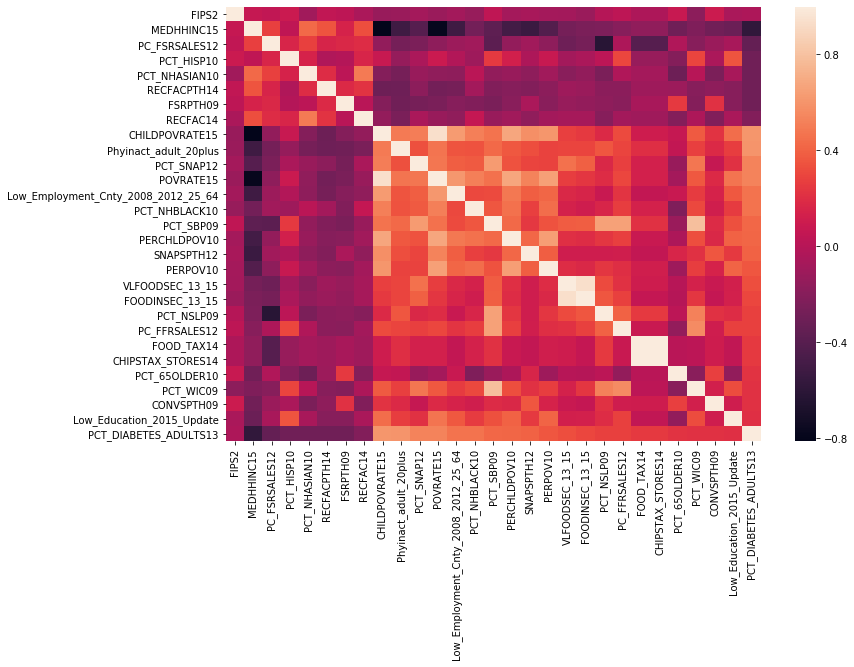

In [245]:
# display the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corrs2)

# Pre-processing

In [246]:
merged_small.describe()

FIPS2     MEDHHINC15  PC_FSRSALES12   PCT_HISP10  PCT_NHASIAN10  \
count   3139.000000    3139.000000    3139.000000  3139.000000    3139.000000   
mean   30392.532972   48611.206117     651.695264     8.292461       1.135387   
std    15156.298611   12351.988288     115.786565    13.196929       2.468433   
min     1001.000000   22894.000000     439.731454     0.000000       0.000000   
25%    18180.000000   40438.000000     573.685136     1.594090       0.270060   
50%    29177.000000   46807.000000     643.144903     3.285739       0.463388   
75%    45080.000000   54164.000000     697.649988     8.235463       0.985868   
max    56045.000000  125900.000000    2160.503105    95.744774      43.014686   

       RECFACPTH14     FSRPTH09     RECFAC14  CHILDPOVRATE15  \
count  3139.000000  3139.000000  3139.000000     3139.000000   
mean      0.068896     0.775356    10.099713       23.238738   
std       0.072157     0.584329    33.605914        9.364172   
min       0.000000     0.000000     0.000000        3.300000   
25%       0.000000     0.494314     0.000000       16.250000   
50%       0.061016     0.668564     2.000000       22.300000   
75%       0.106326     0.898344     6.000000       29.100000   
max       0.822368    13.698630   845.000000       61.600000   

       Phyinact_adult_20plus  ...  FOODINSEC_13_15   PCT_NSLP09  \
count            3139.000000  ...      3139.000000  3139.000000   
mean               26.249442  ...        14.275279    11.122318   
std                 5.514096  ...         2.457809     1.886691   
min                 9.000000  ...         8.500000     6.954298   
25%                23.000000  ...        12.400000     9.275093   
50%                26.000000  ...        14.800000    11.416674   
75%                30.000000  ...        15.400000    13.112031   
max                50.000000  ...        20.800000    13.743786   

       PC_FFRSALES12   FOOD_TAX14  CHIPSTAX_STORES14  PCT_65OLDER10  \
count    3139.000000  3139.000000        3139.000000    3139.000000   
mean      599.602113     1.100629           1.100629      15.883131   
std        78.645676     2.012743           2.012743       4.177263   
min       364.112002     0.000000           0.000000       3.470599   
25%       530.267589     0.000000           0.000000      13.124346   
50%       611.294779     0.000000           0.000000      15.568674   
75%       650.723556     1.225000           1.225000      18.202280   
max      1035.391608     7.000000           7.000000      43.384714   

         PCT_WIC09   CONVSPTH09  Low_Education_2015_Update  \
count  3139.000000  3139.000000                3139.000000   
mean      2.958676     0.600672                   0.148773   
std       0.746478     0.309634                   0.355922   
min       1.386256     0.000000                   0.000000   
25%       2.507607     0.406280                   0.000000   
50%       2.731320     0.550941                   0.000000   
75%       3.286145     0.727443                   0.000000   
max       5.078872     3.121748                   1.000000   

       PCT_DIABETES_ADULTS13  
count            3139.000000  
mean               11.236763  
std                 2.482565  
min                 3.300000  
25%                 9.500000  
50%                11.100000  
75%                12.900000  
max                23.500000  

[8 rows x 29 columns]

In [247]:
merged_small.shape

(3139, 31)

In [248]:
# Define target var, decalur predictors and Split the train-test datasets first
# target var
y=merged_small['PCT_DIABETES_ADULTS13'].copy()

In [249]:
# covariates
# Take out FIPS2 and state
X=merged_small.drop(['PCT_DIABETES_ADULTS13', 'FIPS2', 'State_x', 'County_name'], axis=1)

In [250]:
# split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=.3)

# Standardize and scale the X training dataset

In [251]:
# standardize
from sklearn.preprocessing import StandardScaler
# institiate the SKLearn class
std_scaler=StandardScaler()

In [252]:
# "fit" the scaler tt the data & then transform the data to the new parameters
std_scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [253]:
# pickle the fitted scaler bc we will use this later...
import pickle
filename = open('fitted_scaler.pkl', 'wb')
pickle.dump(std_scaler, filename)
filename.close()

In [254]:
# Now transform
scaled_X_train = std_scaler.transform(X_train)

In [255]:
# confirmt hat it did what you wanted; turn to dataframe. Negtaive means that that is below average; close to 0 is around
# average, and above average the positive
df_scaled_X_train=pd.DataFrame(scaled_X_train, columns=X_train.columns)
df_scaled_X_train.head()

MEDHHINC15  PC_FSRSALES12  PCT_HISP10  PCT_NHASIAN10  RECFACPTH14  \
0   -0.479326       0.315641    0.359446      -0.289459    -0.659206   
1    4.237034       2.295045    0.469093       2.553885     1.346262   
2    0.549707      -0.299898   -0.159585       0.904811     0.406379   
3   -0.126373       0.315641    2.214595      -0.156965    -0.955578   
4    2.230604       6.634521   -0.015411      16.575469    -0.253329   

   FSRPTH09  RECFAC14  CHILDPOVRATE15  Phyinact_adult_20plus  PCT_SNAP12  ...  \
0 -0.536123 -0.258351        0.605844               0.707729    0.034614  ...   
1  0.198508  6.024711       -1.569787              -0.759832    0.182841  ...   
2 -0.146080 -0.065450       -0.812583              -0.209496   -0.355947  ...   
3 -0.298322 -0.285908       -0.002053              -0.392941    0.034614  ...   
4 -0.027736  1.119513       -1.239177              -1.126722   -0.649461  ...   

   VLFOODSEC_13_15  FOODINSEC_13_15  PCT_NSLP09  PC_FFRSALES12  FOOD_TAX14  \
0         0.292789         0.446549    1.077932       1.619037   -0.543241   
1         0.002554         0.047205   -0.980546      -1.474598   -0.543241   
2        -1.351876        -1.270629    0.618569       0.143864   -0.543241   
3         0.292789         0.446549    1.077932       1.619037   -0.543241   
4        -2.609560        -1.829710   -1.653250       2.970719    1.494013   

   CHIPSTAX_STORES14  PCT_65OLDER10  PCT_WIC09  CONVSPTH09  \
0          -0.543241       0.727354   1.388587   -0.952972   
1          -0.543241      -0.154868  -0.409228   -0.998218   
2          -0.543241      -0.461485  -0.418382   -0.763589   
3          -0.543241      -0.647516   1.388587   -0.088491   
4           1.494013      -0.331190  -0.211249   -1.045940   

   Low_Education_2015_Update  
0                   2.457980  
1                  -0.406838  
2                  -0.406838  
3                   2.457980  
4                  -0.406838  

[5 rows x 27 columns]

In [256]:
# check
df_scaled_X_train.std()
df_scaled_X_train.mean()

MEDHHINC15                            -1.171369e-16
PC_FSRSALES12                         -1.881618e-16
PCT_HISP10                             2.329599e-17
PCT_NHASIAN10                          8.406263e-17
RECFACPTH14                           -1.642342e-16
FSRPTH09                              -9.793410e-17
RECFAC14                               9.955118e-18
CHILDPOVRATE15                        -8.312776e-17
Phyinact_adult_20plus                  2.413105e-16
PCT_SNAP12                             1.073334e-16
POVRATE15                             -1.511460e-16
Low_Employment_Cnty_2008_2012_25_64   -2.839988e-16
PCT_NHBLACK10                          2.021344e-19
PCT_SBP09                             -6.507211e-16
PERCHLDPOV10                           9.874264e-17
SNAPSPTH12                            -1.123867e-16
PERPOV10                               8.242029e-17
VLFOODSEC_13_15                       -8.926759e-17
FOODINSEC_13_15                        6.399574e-16
PCT_NSLP09  

In [257]:
# check that the split looks fine, 2192 rows
df_scaled_X_train.shape

(2197, 27)

# Standardize and Scale X-test with the scaler

In [258]:
# fit the scaler on the X test data
scaled_X_test = std_scaler.transform(X_test)

In [259]:
# confirmt hat it did what you wanted; turn to dataframe. Negtaive means that that is below average; close to 0 is around
# average, and above average the positive
df_scaled_X_test=pd.DataFrame(scaled_X_test, columns=X_test.columns)
df_scaled_X_test.head()

MEDHHINC15  PC_FSRSALES12  PCT_HISP10  PCT_NHASIAN10  RECFACPTH14  \
0   -0.413017      -0.079929   -0.370694      -0.304203    -0.725945   
1   -0.785053       0.749745   -0.501924      -0.345559    -0.522794   
2   -0.458319      -1.212563   -0.456214      -0.158190     0.364657   
3    1.572966       0.584236   -0.538556      -0.327080    -0.955578   
4   -1.698626      -1.842239   -0.547053      -0.221119    -0.118748   

   FSRPTH09  RECFAC14  CHILDPOVRATE15  Phyinact_adult_20plus  PCT_SNAP12  ...  \
0  0.483323 -0.258351        0.445871              -0.392941    0.524680  ...   
1 -0.477961 -0.258351        0.477865               0.524284   -1.108860  ...   
2 -0.201686 -0.037893        0.083265               0.157394    1.050096  ...   
3 -0.112597 -0.285908       -1.057874              -1.126722    0.102899  ...   
4 -0.496180 -0.203237        3.016101               1.808399    1.917149  ...   

   VLFOODSEC_13_15  FOODINSEC_13_15  PCT_NSLP09  PC_FFRSALES12  FOOD_TAX14  \
0        -0.094191        -0.032664   -0.459731       0.565268   -0.543241   
1        -0.577916        -1.150826   -0.834330       0.442391    0.220730   
2         1.550474         1.325104    0.642196       0.941362    1.494013   
3        -1.351876        -1.789775   -1.221779      -2.960123   -0.543241   
4         0.970004         0.366680    1.404856       0.344941    3.021953   

   CHIPSTAX_STORES14  PCT_65OLDER10  PCT_WIC09  CONVSPTH09  \
0          -0.543241       1.195072  -0.041113    0.465740   
1           0.220730       0.518960  -1.240838    0.363671   
2           1.494013       0.196304   0.036860    0.050263   
3          -0.543241      -0.444547  -0.198322    2.677173   
4           3.021953      -0.851989   1.084292    1.073719   

   Low_Education_2015_Update  
0                  -0.406838  
1                  -0.406838  
2                  -0.406838  
3                  -0.406838  
4                   2.457980  

[5 rows x 27 columns]

In [260]:
# check
df_scaled_X_test.std()
df_scaled_X_test.mean()

MEDHHINC15                            -0.030166
PC_FSRSALES12                         -0.008499
PCT_HISP10                            -0.009111
PCT_NHASIAN10                          0.009957
RECFACPTH14                           -0.048983
FSRPTH09                              -0.019076
RECFAC14                              -0.025284
CHILDPOVRATE15                         0.042463
Phyinact_adult_20plus                  0.065671
PCT_SNAP12                             0.049126
POVRATE15                              0.048450
Low_Employment_Cnty_2008_2012_25_64    0.063252
PCT_NHBLACK10                          0.067954
PCT_SBP09                              0.003168
PERCHLDPOV10                          -0.017621
SNAPSPTH12                             0.054160
PERPOV10                               0.027552
VLFOODSEC_13_15                        0.012619
FOODINSEC_13_15                       -0.008669
PCT_NSLP09                             0.018356
PC_FFRSALES12                         -0

In [261]:
# check that the split looks file, 940 rows
df_scaled_X_test.shape

(942, 27)

# Initiate the model on the scaled X-train dataset with physical activity

In [262]:
# Intisiate the model
ln_model=LinearRegression()
# fit on the training data
ln_model.fit(df_scaled_X_train, y_train)
# Predict on the testing data
y_preds=ln_model.predict(df_scaled_X_test)
# Calculate evaluation matrix
ln_rmse=sqrt(metrics.mean_squared_error(y_test, y_preds))
# R2
ln_r2 = metrics.r2_score(y_test, y_preds)
round(ln_r2, 2)
# Display
print('ln_RMSE', "%.4f" % round(ln_rmse,4))
print('ln_R2', "%.4f" % round(ln_r2,4))
# Pickle
filename=open('ln_model.pkl', 'wb')
pickle.dump(ln_model, filename)
filename.close()

ln_RMSE 1.3443
ln_R2 0.7154


In [263]:
# coefficients
ln_model.coef_

array([ 0.08381543, -0.35754954, -0.48702564, -0.01860648, -0.06967189,
       -0.24306647,  0.02131985,  0.92924466,  0.52262754,  0.71700481,
       -0.46306875,  0.1119193 ,  0.39130297, -0.07021353, -0.01601826,
        0.06663081,  0.05737806, -0.28132397,  0.18619327,  0.07110587,
        0.47291833,  0.04107974,  0.04107974,  0.58042006, -0.44604413,
        0.00246448,  0.09006528])

In [264]:
# check the first 5 predictions
[round(x,2) for x in y_preds[:5]]

[12.36, 12.06, 13.1, 8.71, 17.39]

In [265]:
# compare the first 5 pred with actual 
list(y_test[:5])

[12.3, 9.7, 14.2, 7.4, 14.9]

# Evaluate the model with physical acitivity

In [266]:
# RMSE. Is this good enough? The best way to know how good that is is to compare it to the average y (hypothetical prediction with using only the average)
from math import sqrt
rmse=sqrt(metrics.mean_squared_error(y_test, y_preds))
rmse

1.3442879007640125

In [267]:
# is that more or less than if we just use the average of y to predcict y? 
avg_val=y_train.mean()
avg_val

11.207692307692302

In [268]:
# allocate the average y as a variabla
comparison = np.full((len(y_test), ), avg_val)
comparison

array([11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20769231,
       11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20769231,
       11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20769231,
       11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20769231,
       11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20769231,
       11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20769231,
       11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20769231,
       11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20769231,
       11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20769231,
       11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20769231,
       11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20769231,
       11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20769231,
       11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20769231,
       11.20769231, 11.20769231, 11.20769231, 11.20769231, 11.20

In [269]:
# check y_preds
y_preds

array([12.36101984, 12.05544662, 13.09720769,  8.70619404, 17.39080048,
        9.35403295, 11.74341556,  9.08808598, 11.37713512, 10.23450333,
       15.6017691 ,  9.78384271,  9.74675263, 10.56624376, 12.65280382,
        8.96748993, 13.20800778,  9.54239861, 13.62525811, 10.15675328,
        9.0424079 , 16.28775422,  9.88406456,  6.6668152 , 11.48810036,
       13.27603919,  9.97892704, 11.14231636,  9.26047492, 10.72854498,
       12.49934843, 10.43327573, 12.34471211,  9.15784755, 12.52879656,
       14.31706909, 12.34468283,  9.94701946, 12.37275764,  6.58027844,
        9.61062326,  9.73532654, 13.49666273, 11.04580359, 10.45624746,
        8.34887933, 11.53391316,  7.99661517,  7.43159429, 11.48565901,
       11.99426578, 10.70309042, 12.67192338, 17.56066751, 14.15473396,
       14.19551475, 12.73730984, 13.48418268, 10.07004296,  8.33539282,
       11.31122913, 12.59912169,  9.7412185 , 12.38534092, 12.83354761,
       11.89580854, 12.22793679,  9.63554719, 15.98755792, 12.70

In [270]:
# what would the rmse error be if i simply predicted the average value of all counties?
# compare those two: 2.5 is higher than 1.29; so predciting model perfomrs better than using y-average to predict new data
sqrt(metrics.mean_squared_error(y_test, comparison))

2.521851499217954

In [271]:
# R squared; 73 hmmmm
r2 = metrics.r2_score(y_test, y_preds)
round(r2, 2)

0.72

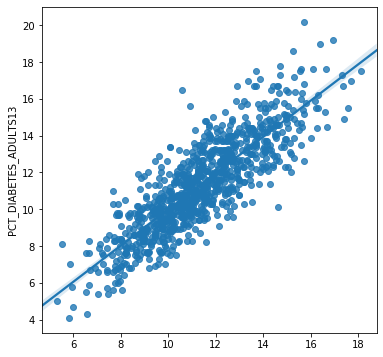

In [272]:
# scatterplot...Interesting; I think the data provider was doing some pre-processing 
plt.figure(figsize=(6,6))
sns.regplot(x=y_preds, y=y_test)

In [273]:
# pickle the model. So you ca sent it and others can look at it. Now it is as a separate file in the folder
import pickle
filename=open('ln_model.pkl', 'wb')
pickle.dump(ln_model, filename)
filename.close()

# Predict on new data

In [274]:
# let;s make up some new data. generate new data..anything
list(df_scaled_X_train.loc[1])

[4.237033851442816,
 2.2950453673294375,
 0.46909272796597373,
 2.5538854622856495,
 1.3462617897014555,
 0.1985080890994809,
 6.024711377876906,
 -1.5697874377520855,
 -0.7598316102010069,
 0.18284087916370598,
 -1.5644559499302533,
 -0.6227930079604069,
 0.14643143153010962,
 -0.7255743055667182,
 -0.5421025246501234,
 -1.2383393102992448,
 -0.3501952152862774,
 0.002554032279416194,
 0.04720505944959775,
 -0.9805456069377823,
 -1.4745979288899467,
 -0.5432406030965469,
 -0.5432406030965469,
 -0.1548682019630468,
 -0.409228383597042,
 -0.9982183920250546,
 -0.40683810217248617]

In [275]:
#generate and then predict -- new data should be scaled as well...right? So derived from df_scaled_X_train. Predicts 13% of adults with diabetes
new_data =[[0.8186867025583962,
 -1.7020254193661033,
 0.6244210465060261,
 0.05597335201578833,
 -0.14894935246486804,
 -0.5270067878230345,
 0.1716752748142429,
 -0.810074056847644,
 -1.1670927910530775,
 -1.4791796113659688,
 -0.5921749705930331,
 -0.6312466321733303,
 -0.5208691547566083,
 -1.1388822593880072,
 -0.5413996640496541,
 -0.9917602188501025,
 -0.3493756286985377,
 -1.1752524310147228,
 -0.9597393058439989,
 0.5200139481427476,
 -0.010464547540764953,
 0.29842106558969445,
 0.29842106558969445,
 -1.4106449777941492,
 -0.48048813910931065,
 -0.9504751287375898,
 -0.4151609221117349]]
ln_model.predict(new_data)

array([8.86511699])

# Same linear model but without physical activity

In [276]:
# take physical activity out from the dataset
df_scaled_X_train2=df_scaled_X_train.drop(['Phyinact_adult_20plus'], axis=1)
df_scaled_X_test2=df_scaled_X_test.drop(['Phyinact_adult_20plus'], axis=1)
# y stays as before and Split test-train stays as before
# Intisiate the model
ln2_model=LinearRegression()
# fit on the training data
ln2_model.fit(df_scaled_X_train2, y_train)
# Predict on the testing data
y_preds2=ln2_model.predict(df_scaled_X_test2)
# Calculate evaluation matrix
ln2_rmse=sqrt(metrics.mean_squared_error(y_test, y_preds2))
# R2
ln2_r2 = metrics.r2_score(y_test, y_preds2)
round(ln2_r2, 2)
# Display
print('ln2_RMSE', "%.4f" % round(ln2_rmse,4))
print('ln2_R2', "%.4f" % round(ln2_r2,4))
# Pickle
filename=open('ln2_model.pkl', 'wb')
pickle.dump(ln2_model, filename)
filename.close()

ln2_RMSE 1.4078
ln2_R2 0.6879


# Comparison of two models (with and without physical activity)

In [277]:
# create lists from the metrics we produced.
rmse_both=[ln_rmse, ln2_rmse]
r2_both=[ln_r2, ln2_r2]

In [315]:
# Comparison of model metrics
models=['ln with physical activity', 'ln without physical activity']
index=['RMSE', 'R2']
compare_models=pd.DataFrame([rmse_both, r2_both], index=index, columns=models)
# save to pickle, for later use by plotly dash app.
compare_models.to_pickle('resources/compare_models.pkl')

In [316]:
compare_models.head()

ln with physical activity  ln without physical activity
RMSE                   1.344288                      1.407773
R2                     0.715431                      0.687919

In [280]:
# Define the color palette 
Viridis=[
"#440154", "#440558", "#450a5c", "#450e60", "#451465", "#461969",
"#461d6d", "#462372", "#472775", "#472c7a", "#46307c", "#45337d",
"#433880", "#423c81", "#404184", "#3f4686", "#3d4a88", "#3c4f8a",
"#3b518b", "#39558b", "#37598c", "#365c8c", "#34608c", "#33638d",
"#31678d", "#2f6b8d", "#2d6e8e", "#2c718e", "#2b748e", "#29788e",
"#287c8e", "#277f8e", "#25848d", "#24878d", "#238b8d", "#218f8d",
"#21918d", "#22958b", "#23988a", "#239b89", "#249f87", "#25a186",
"#25a584", "#26a883", "#27ab82", "#29ae80", "#2eb17d", "#35b479",
"#3cb875", "#42bb72", "#49be6e", "#4ec16b", "#55c467", "#5cc863",
"#61c960", "#6bcc5a", "#72ce55", "#7cd04f", "#85d349", "#8dd544",
"#97d73e", "#9ed93a", "#a8db34", "#b0dd31", "#b8de30", "#c3df2e",
"#cbe02d", "#d6e22b", "#e1e329", "#eae428", "#f5e626", "#fde725"]
# source: https://bhaskarvk.github.io/colormap/reference/colormap.html

In [281]:
# Let's display that with plotly.
mydata1 = go.Bar(
    x=compare_models.loc['RMSE'].index,
    y=compare_models.loc['RMSE'],
    name=compare_models.index[0],
    marker=dict(color=Viridis[50])
)
mydata2 = go.Bar(
    x=compare_models.loc['R2'].index,
    y=compare_models.loc['R2'],
    name=compare_models.index[1],
    marker=dict(color=Viridis[30])
)
mylayout = go.Layout(
    title='Comparison of Linear Models with and without physical activity',
    xaxis = dict(title = 'Predictive models'), # x-axis label
    yaxis = dict(title = 'evaluation matrixes'), # y-axis label
    
)
fig = go.Figure(data=[mydata1, mydata2], layout=mylayout)
iplot(fig)

In [282]:
# How to add a second y axis?

# Random forest prediction on dummy above/below national average of diabetes

In [283]:
# Dependent dummy for 0-below national average of diabtes; 1-above national average
# what is the national average?
# 11.24

In [284]:
merged_small.head(5)

FIPS2 State_x     County_name  MEDHHINC15  PC_FSRSALES12  PCT_HISP10  \
0   1085      AL  Lowndes County     31117.0     512.280987    0.769980   
1   1105      AL    Perry County     26218.0     512.280987    1.076386   
2   1063      AL   Greene County     25398.0     512.280987    0.762852   
3   1091      AL  Marengo County     35389.0     512.280987    1.674038   
4   1119      AL   Sumter County     25931.0     512.280987    0.624864   

   PCT_NHASIAN10  RECFACPTH14  FSRPTH09  RECFAC14  ...  FOODINSEC_13_15  \
0       0.123905     0.094518  0.000000         1  ...             17.6   
1       0.283259     0.000000  0.467727         0  ...             17.6   
2       0.165837     0.000000  0.326726         0  ...             17.6   
3       0.252057     0.049726  0.566840         1  ...             17.6   
4       0.239773     0.075953  0.363742         1  ...             17.6   

   PCT_NSLP09  PC_FFRSALES12  FOOD_TAX14  CHIPSTAX_STORES14  PCT_65OLDER10  \
0   12.315055      674.80272         4.0                4.0      14.647314   
1   12.315055      674.80272         4.0                4.0      16.702861   
2   12.315055      674.80272         4.0                4.0      16.075180   
3   12.315055      674.80272         4.0                4.0      16.283826   
4   12.315055      674.80272         4.0                4.0      14.989465   

   PCT_WIC09  CONVSPTH09  Low_Education_2015_Update  PCT_DIABETES_ADULTS13  
0   2.990417    0.870625                          0                   23.5  
1   2.990417    0.748363                          1                   21.7  
2   2.990417    0.871270                          0                   21.0  
3   2.990417    1.039206                          0                   20.2  
4   2.990417    1.382220                          0                   20.1  

[5 rows x 31 columns]

In [285]:
# I will create new variables and want them in another datafile for the random forest. Careful because now I went back
# to the original datafile before scaling, so now I need to create the dummy and then split-train-test and then scale. Do
# I need to use the pickled scaler? Basically, the only thing which is different is the outcome variable - y-train, y-test; the rest
# X-traon and X-test are the same here as before. So I should use the pickled scaler, right?
merged_small2=merged_small

In [286]:
merged_small2['PCT_DIABETES_ADULTS13'].describe()

count    3139.000000
mean       11.236763
std         2.482565
min         3.300000
25%         9.500000
50%        11.100000
75%        12.900000
max        23.500000
Name: PCT_DIABETES_ADULTS13, dtype: float64

In [287]:
# generate dummy for above and below national average 
merged_small2['diabetes']='0'
merged_small2.loc[merged_small2['PCT_DIABETES_ADULTS13']<11.3, 'diabetes']='0'
merged_small2.loc[merged_small2['PCT_DIABETES_ADULTS13']>=11.3, 'diabetes']='1'
merged_small2['diabetes'].value_counts()

0    1667
1    1472
Name: diabetes, dtype: int64

In [288]:
merged_small2.columns

Index(['FIPS2', 'State_x', 'County_name', 'MEDHHINC15', 'PC_FSRSALES12',
       'PCT_HISP10', 'PCT_NHASIAN10', 'RECFACPTH14', 'FSRPTH09', 'RECFAC14',
       'CHILDPOVRATE15', 'Phyinact_adult_20plus', 'PCT_SNAP12', 'POVRATE15',
       'Low_Employment_Cnty_2008_2012_25_64', 'PCT_NHBLACK10', 'PCT_SBP09',
       'PERCHLDPOV10', 'SNAPSPTH12', 'PERPOV10', 'VLFOODSEC_13_15',
       'FOODINSEC_13_15', 'PCT_NSLP09', 'PC_FFRSALES12', 'FOOD_TAX14',
       'CHIPSTAX_STORES14', 'PCT_65OLDER10', 'PCT_WIC09', 'CONVSPTH09',
       'Low_Education_2015_Update', 'PCT_DIABETES_ADULTS13', 'diabetes'],
      dtype='object')

In [289]:
merged_small2.describe()

FIPS2     MEDHHINC15  PC_FSRSALES12   PCT_HISP10  PCT_NHASIAN10  \
count   3139.000000    3139.000000    3139.000000  3139.000000    3139.000000   
mean   30392.532972   48611.206117     651.695264     8.292461       1.135387   
std    15156.298611   12351.988288     115.786565    13.196929       2.468433   
min     1001.000000   22894.000000     439.731454     0.000000       0.000000   
25%    18180.000000   40438.000000     573.685136     1.594090       0.270060   
50%    29177.000000   46807.000000     643.144903     3.285739       0.463388   
75%    45080.000000   54164.000000     697.649988     8.235463       0.985868   
max    56045.000000  125900.000000    2160.503105    95.744774      43.014686   

       RECFACPTH14     FSRPTH09     RECFAC14  CHILDPOVRATE15  \
count  3139.000000  3139.000000  3139.000000     3139.000000   
mean      0.068896     0.775356    10.099713       23.238738   
std       0.072157     0.584329    33.605914        9.364172   
min       0.000000     0.000000     0.000000        3.300000   
25%       0.000000     0.494314     0.000000       16.250000   
50%       0.061016     0.668564     2.000000       22.300000   
75%       0.106326     0.898344     6.000000       29.100000   
max       0.822368    13.698630   845.000000       61.600000   

       Phyinact_adult_20plus  ...  FOODINSEC_13_15   PCT_NSLP09  \
count            3139.000000  ...      3139.000000  3139.000000   
mean               26.249442  ...        14.275279    11.122318   
std                 5.514096  ...         2.457809     1.886691   
min                 9.000000  ...         8.500000     6.954298   
25%                23.000000  ...        12.400000     9.275093   
50%                26.000000  ...        14.800000    11.416674   
75%                30.000000  ...        15.400000    13.112031   
max                50.000000  ...        20.800000    13.743786   

       PC_FFRSALES12   FOOD_TAX14  CHIPSTAX_STORES14  PCT_65OLDER10  \
count    3139.000000  3139.000000        3139.000000    3139.000000   
mean      599.602113     1.100629           1.100629      15.883131   
std        78.645676     2.012743           2.012743       4.177263   
min       364.112002     0.000000           0.000000       3.470599   
25%       530.267589     0.000000           0.000000      13.124346   
50%       611.294779     0.000000           0.000000      15.568674   
75%       650.723556     1.225000           1.225000      18.202280   
max      1035.391608     7.000000           7.000000      43.384714   

         PCT_WIC09   CONVSPTH09  Low_Education_2015_Update  \
count  3139.000000  3139.000000                3139.000000   
mean      2.958676     0.600672                   0.148773   
std       0.746478     0.309634                   0.355922   
min       1.386256     0.000000                   0.000000   
25%       2.507607     0.406280                   0.000000   
50%       2.731320     0.550941                   0.000000   
75%       3.286145     0.727443                   0.000000   
max       5.078872     3.121748                   1.000000   

       PCT_DIABETES_ADULTS13  
count            3139.000000  
mean               11.236763  
std                 2.482565  
min                 3.300000  
25%                 9.500000  
50%                11.100000  
75%                12.900000  
max                23.500000  

[8 rows x 29 columns]

In [290]:
merged_small2.head(5)

FIPS2 State_x     County_name  MEDHHINC15  PC_FSRSALES12  PCT_HISP10  \
0   1085      AL  Lowndes County     31117.0     512.280987    0.769980   
1   1105      AL    Perry County     26218.0     512.280987    1.076386   
2   1063      AL   Greene County     25398.0     512.280987    0.762852   
3   1091      AL  Marengo County     35389.0     512.280987    1.674038   
4   1119      AL   Sumter County     25931.0     512.280987    0.624864   

   PCT_NHASIAN10  RECFACPTH14  FSRPTH09  RECFAC14  ...  PCT_NSLP09  \
0       0.123905     0.094518  0.000000         1  ...   12.315055   
1       0.283259     0.000000  0.467727         0  ...   12.315055   
2       0.165837     0.000000  0.326726         0  ...   12.315055   
3       0.252057     0.049726  0.566840         1  ...   12.315055   
4       0.239773     0.075953  0.363742         1  ...   12.315055   

   PC_FFRSALES12  FOOD_TAX14  CHIPSTAX_STORES14  PCT_65OLDER10  PCT_WIC09  \
0      674.80272         4.0                4.0      14.647314   2.990417   
1      674.80272         4.0                4.0      16.702861   2.990417   
2      674.80272         4.0                4.0      16.075180   2.990417   
3      674.80272         4.0                4.0      16.283826   2.990417   
4      674.80272         4.0                4.0      14.989465   2.990417   

   CONVSPTH09  Low_Education_2015_Update  PCT_DIABETES_ADULTS13  diabetes  
0    0.870625                          0                   23.5         1  
1    0.748363                          1                   21.7         1  
2    0.871270                          0                   21.0         1  
3    1.039206                          0                   20.2         1  
4    1.382220                          0                   20.1         1  

[5 rows x 32 columns]

In [291]:
merged_small2['FIPS2'].describe()

count     3139.000000
mean     30392.532972
std      15156.298611
min       1001.000000
25%      18180.000000
50%      29177.000000
75%      45080.000000
max      56045.000000
Name: FIPS2, dtype: float64

In [292]:
# Split the data
X = merged_small2.drop(['diabetes', 'PCT_DIABETES_ADULTS13', 'FIPS2', 'State_x', 'County_name'], axis=1)
y = merged_small2['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4, test_size=.3)
X_train.shape 

(2197, 27)

In [293]:
# List the features
X.columns

Index(['MEDHHINC15', 'PC_FSRSALES12', 'PCT_HISP10', 'PCT_NHASIAN10',
       'RECFACPTH14', 'FSRPTH09', 'RECFAC14', 'CHILDPOVRATE15',
       'Phyinact_adult_20plus', 'PCT_SNAP12', 'POVRATE15',
       'Low_Employment_Cnty_2008_2012_25_64', 'PCT_NHBLACK10', 'PCT_SBP09',
       'PERCHLDPOV10', 'SNAPSPTH12', 'PERPOV10', 'VLFOODSEC_13_15',
       'FOODINSEC_13_15', 'PCT_NSLP09', 'PC_FFRSALES12', 'FOOD_TAX14',
       'CHIPSTAX_STORES14', 'PCT_65OLDER10', 'PCT_WIC09', 'CONVSPTH09',
       'Low_Education_2015_Update'],
      dtype='object')

# Scale 

In [294]:
# standardize
from sklearn.preprocessing import StandardScaler
# institiate the SKLearn class
std_scaler2=StandardScaler()
# "fit" the scaler tt the data & then transform the data to the new parameters
std_scaler2.fit(X_train)
# pickle the fitted scaler bc we will use this later...
import pickle
filename = open('fitted_scaler2.pkl', 'wb')
pickle.dump(std_scaler2, filename)
filename.close()
# Now transform
scaled_X_train2 = std_scaler2.transform(X_train)
# confirmt hat it did what you wanted; turn to dataframe. Negative means that that is below average; close to 0 is around
# average, and above average the positive
df_scaled_X_train2=pd.DataFrame(scaled_X_train, columns=X_train.columns)
df_scaled_X_train2.head()
# check
df_scaled_X_train2.std()
df_scaled_X_train2.mean()
# fit the scaler on the X test data
scaled_X_test2 = std_scaler2.transform(X_test)
# confirmt hat it did what you wanted; turn to dataframe. Negtaive means that that is below average; close to 0 is around
# average, and above average the positive
df_scaled_X_test2=pd.DataFrame(scaled_X_test2, columns=X_test.columns)
df_scaled_X_test2.head()
# check
df_scaled_X_test2.std()
df_scaled_X_test2.mean()

MEDHHINC15                            -0.030166
PC_FSRSALES12                         -0.008499
PCT_HISP10                            -0.009111
PCT_NHASIAN10                          0.009957
RECFACPTH14                           -0.048983
FSRPTH09                              -0.019076
RECFAC14                              -0.025284
CHILDPOVRATE15                         0.042463
Phyinact_adult_20plus                  0.065671
PCT_SNAP12                             0.049126
POVRATE15                              0.048450
Low_Employment_Cnty_2008_2012_25_64    0.063252
PCT_NHBLACK10                          0.067954
PCT_SBP09                              0.003168
PERCHLDPOV10                          -0.017621
SNAPSPTH12                             0.054160
PERPOV10                               0.027552
VLFOODSEC_13_15                        0.012619
FOODINSEC_13_15                       -0.008669
PCT_NSLP09                             0.018356
PC_FFRSALES12                         -0

In [295]:
# Instantiate and Fit the Model with Optimal Settings
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, BaggingClassifier
rf = RandomForestClassifier(class_weight= None, 
                            max_depth= 3, 
                            min_samples_leaf= 5, 
                            min_samples_split= 5, 
                            n_estimators= 100)
tree_model=rf.fit(df_scaled_X_train2, y_train)

In [296]:
# The crossvalidiation score scores our performance on the training data. 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
scores = cross_val_score(tree_model, df_scaled_X_train2, y_train, cv=5)
np.mean(scores), np.std(scores) # This is the mean of the 5 cv scores, plus its standard dev.

(0.8033671567612343, 0.013726469664713335)

In [297]:
# Predict the y values on the testing data.
y_hat = tree_model.predict(df_scaled_X_test2)
y_hat_probs = tree_model.predict_proba(df_scaled_X_test2)[:,1]

# Accuracy score

In [298]:
# ACCURACY
accuracy=100*metrics.accuracy_score(y_test, y_hat)
print(accuracy)

82.16560509554141


In [299]:
# A confusion matrix tells us our false positives and false negatives...test data (30% of full dataset):
mat = confusion_matrix(y_test, y_hat)
print (mat)

[[428  52]
 [116 346]]


In [300]:
# Let's interpret that. tn-true negative; fp-false positive...
tn, fp, fn, tp = mat.ravel()
sensitivity = 100*tp/(tp+fn)
specificity=100*tn/(tn+fp)
print('sensitivity:', sensitivity)
print('specificity:', specificity)

sensitivity: 74.89177489177489
specificity: 89.16666666666667


In [301]:
# Our ROC-AUC score measures the trade-off between specificity and sensitivity
# AUC stands for "Area under the ROC Curve." That is, AUC measures the entire two-dimensional area underneath 
# the entire ROC curve (think integral calculus) from (0,0) to (1,1) https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc
# AUC ranges in value from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.
# AUC is desirable for the following two reasons:
# AUC is scale-invariant. It measures how well predictions are ranked, rather than their absolute values.
# AUC is classification-threshold-invariant. It measures the quality of the model's predictions irrespective of what classification
# threshold is chosen.
from sklearn.metrics import roc_auc_score
roc_score=100*roc_auc_score(y_test, y_hat_probs)
print(roc_score)

90.05050505050507


# Feature importance

In [302]:
# compute the feature importances
importances = tree_model.feature_importances_
std = np.std([tree.feature_importances_ for tree in tree_model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 0 (0.183341)
2. feature 9 (0.176262)
3. feature 7 (0.135324)
4. feature 8 (0.104406)
5. feature 10 (0.067099)
6. feature 1 (0.052555)
7. feature 13 (0.044243)
8. feature 20 (0.032097)
9. feature 2 (0.031177)
10. feature 11 (0.028277)
11. feature 3 (0.027935)
12. feature 15 (0.016114)
13. feature 23 (0.015008)
14. feature 18 (0.013835)
15. feature 17 (0.013416)
16. feature 6 (0.012783)
17. feature 4 (0.010794)
18. feature 12 (0.010715)
19. feature 19 (0.007106)
20. feature 14 (0.006886)
21. feature 25 (0.003664)
22. feature 5 (0.002782)
23. feature 24 (0.002095)
24. feature 22 (0.001303)
25. feature 21 (0.000583)
26. feature 26 (0.000199)
27. feature 16 (0.000000)


In [303]:
# OK...but what is the name of variable? List the features by importance:
feat_imp=pd.DataFrame(importances, index=X_test.columns, columns=['importance'])
feat_imp['importance'].sort_values(ascending=False).head(27)

MEDHHINC15                             0.183341
PCT_SNAP12                             0.176262
CHILDPOVRATE15                         0.135324
Phyinact_adult_20plus                  0.104406
POVRATE15                              0.067099
PC_FSRSALES12                          0.052555
PCT_SBP09                              0.044243
PC_FFRSALES12                          0.032097
PCT_HISP10                             0.031177
Low_Employment_Cnty_2008_2012_25_64    0.028277
PCT_NHASIAN10                          0.027935
SNAPSPTH12                             0.016114
PCT_65OLDER10                          0.015008
FOODINSEC_13_15                        0.013835
VLFOODSEC_13_15                        0.013416
RECFAC14                               0.012783
RECFACPTH14                            0.010794
PCT_NHBLACK10                          0.010715
PCT_NSLP09                             0.007106
PERCHLDPOV10                           0.006886
CONVSPTH09                             0

# Predict probabilities for counties

In [317]:
# Make sure the all zip codes are 5 digits long (some of them start with 00)
merged_small2['County FIPS Code'] = merged_small2['FIPS2'].apply(lambda x: str(x).zfill(5))
# Confirm that worked okay.
merged_small2[['County FIPS Code', 'FIPS2']].head(3)

County FIPS Code  FIPS2
0            01085   1085
1            01105   1105
2            01063   1063

In [319]:
merged_small2.columns

Index(['FIPS2', 'State_x', 'County_name', 'MEDHHINC15', 'PC_FSRSALES12',
       'PCT_HISP10', 'PCT_NHASIAN10', 'RECFACPTH14', 'FSRPTH09', 'RECFAC14',
       'CHILDPOVRATE15', 'Phyinact_adult_20plus', 'PCT_SNAP12', 'POVRATE15',
       'Low_Employment_Cnty_2008_2012_25_64', 'PCT_NHBLACK10', 'PCT_SBP09',
       'PERCHLDPOV10', 'SNAPSPTH12', 'PERPOV10', 'VLFOODSEC_13_15',
       'FOODINSEC_13_15', 'PCT_NSLP09', 'PC_FFRSALES12', 'FOOD_TAX14',
       'CHIPSTAX_STORES14', 'PCT_65OLDER10', 'PCT_WIC09', 'CONVSPTH09',
       'Low_Education_2015_Update', 'PCT_DIABETES_ADULTS13', 'diabetes',
       'County FIPS Code'],
      dtype='object')

In [318]:
# Predict the y values on the entire dataset.
y_hat = tree_model.predict(X)
y_hat_probs = tree_model.predict_proba(X)[:,1]

In [306]:
# create a new dataset with only the columns we need
submission=pd.DataFrame(list(zip(merged_small2['County_name'], y_hat_probs)), columns=['Name','Probability'])

In [307]:
# convert probabilities to percentages
submission['Probability'] = submission['Probability'].apply(lambda x: round(x*100, 1))

In [309]:
submission.head()

FIPS2  Probability
0  01085         58.9
1  01105         58.6
2  01063         60.8
3  01091         56.3
4  01119         58.0

In [310]:
# Confirm that we have the right length (one value for every county)
print(len(merged_small2))
print(len(y_hat_probs))
len(submission)

3139
3139


3139

In [313]:
# export
submission.to_csv('predict_proba.csv', index=False)

In [314]:
# pickle the fitted scaler bc we will use this later...
import pickle
filename = open('predict_proba.pkl', 'wb')
pickle.dump(submission, filename)
filename.close()

In [ ]:
################### mistake detection: check line by line to see it gves what I want!

In [ ]:
def page_4_diabetes(value):
    #diabetes=df.loc[value, 'diabetes_prob']
    filepath='resources/predict_proba.csv'
    df=pd.read_csv(filepath)
    names=df['FIPS2'].values
    index=df['FIPS2'].index.values
    nameslist = list(zip(index, names))

    df=df[df['FIPS2']==value]
    diabetes=df['Probability']
    return f'Predicted probability of diabetes is {diabetes}%'